# Performance of baseline and transfer learning models
In this section we are visualizing the performance of the model measured as the concordance index across the model training iterations (epochs). 

In [1]:
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from xai.models.explainer import TransformerSurvivalEvaluator
from xai.models.explainer import compute_performance_folds

2025-08-14 16:56:33.040854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:56:33.102948: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 16:56:33.465749: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 16:56:33.465782: W tensorflow/compiler/xla/stream_exe

In [3]:
from samecode.plot.pyplot import subplots
import seaborn as sns

In [4]:
import numpy as np 
import pandas as pd

In [5]:
experiments = [
    ['Survival', '', 'Baseline'],
    ['TransferLearningSurvival', 'model.E002000.h5', 'TransferLearning'],
]

res = []
exps = []
metric = 'epoch_sigmoid_concordance'

res = []
exps = []
for run_id, pretrained, label in experiments:
    exp = compute_performance_folds(
        Evaluator=TransformerSurvivalEvaluator,
        path='./results/{}/{}/'.format(run_id, pretrained),
        label=label,
        metric=metric, 
        split='validation'
    )
    exps.append(exp)
    exp = exp.groupby(['epoch', 'Model']).agg({metric: [np.mean, np.std]}).reset_index()
    exp.columns=['epoch', 'Model', '{}_mean'.format(metric), '{}_std'.format(metric)]
    
    res.append(exp)

res = pd.concat(res)
exps = pd.concat(exps)

2025-08-14 16:56:36.611262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-14 16:56:36.611279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wu
2025-08-14 16:56:36.611282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wu
2025-08-14 16:56:36.611357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.230.2
2025-08-14 16:56:36.611366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.230.2
2025-08-14 16:56:36.611368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.230.2
2025-08-14 16:56:36.611540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

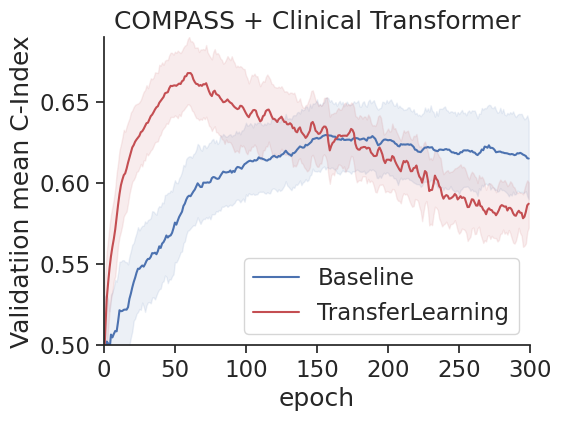

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.5)

fig, ax = plt.subplots(figsize=(5.5, 4))

sns.lineplot(data=exps, x = 'epoch', 
             y = 'epoch_sigmoid_concordance', 
             hue = 'Model', ax=ax, errorbar=('ci', 85),
             palette=['b', 'r']
            )

for artist in ax.collections:
    if artist.__class__.__name__ == 'PolyCollection':
        artist.set_alpha(0.1)  # shadow alpha
        
ax.set_ylim(0.5, 0.69)
ax.set_xlim(0,300)
ax.tick_params(bottom=True, left=True)
ax.set_ylabel('Validatiion mean C-Index')
ax.set_title('COMPASS + Clinical Transformer')
sns.despine()
ax.legend_.set_title('')
fig.savefig('./results/validtaion_cindex.svg', bbox_inches = 'tight')